In [71]:
import numpy as np
import pandas as pd
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '1'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [72]:
bd1 = np.load('./dataset/seq_bathroom_1714007389.npy')
bd2 = np.load('./dataset/seq_bathroom_1714008718.npy')
bd3 = np.load('./dataset/0_seq_bathroom.npy')
# 두 데이터셋을 합치기
bathroom = np.concatenate((bd1, bd2, bd3), axis=0)

In [73]:
sd1 = np.load('./dataset/seq_scissors_1714010055.npy')
sd2 = np.load('./dataset/seq_scissors_1714010104.npy')
sd3 = np.load('./dataset/1_seq_scissors.npy')

scissors=np.concatenate((sd1, sd2, bd3), axis = 0)

In [74]:
rd1 = np.load('./dataset/2_seq_rainbow.npy')
rd2 = np.load('./dataset/seq_rainbow_1714013879.npy')

rainbow = np. concatenate((rd1, rd2), axis = 0)

In [75]:
gd1 = np.load('./dataset/3_seq_ginseng.npy')
gd2 = np.load('./dataset/seq_ginseng_1714013922.npy')

ginseng = np.concatenate((gd1, gd2), axis = 0)

In [76]:
md1 = np.load('./dataset/4_seq_mountain.npy')
md2 = np.load('./dataset/seq_mountain_1714013963.npy')

mountain = np.concatenate((md1, md2), axis = 0)

In [77]:
gr1 = np.load('./dataset/5_seq_girl.npy')
gr2 = np.load('./dataset/seq_girl_1714014003.npy')

girl = np.concatenate ((gr1, gr2), axis = 0)

In [78]:
std1 = np.load('./dataset/6_seq_sometimes.npy')
std2 = np.load('./dataset/seq_sometimes_1714014045.npy')

sometimes = np.concatenate ((std1, std2), axis =0)

In [79]:
nd1 = np.load('./dataset/7_seq_nineteen.npy')
nd2 = np.load('./dataset/seq_nineteen_1714014092.npy')

nineteen = np.concatenate ((nd1, nd2), axis = 0)

In [80]:
rmd1 = np.load('./dataset/8_seq_remote.npy')
rmd2 = np.load('./dataset/seq_remote_1714014135.npy')

remote = np.concatenate ((rmd1, rmd2), axis = 0)

In [81]:
rjd1 = np.load('./dataset/9_seq_reject.npy')
rjd2 = np.load('./dataset/seq_reject_1714014979.npy')

reject = np.concatenate((rjd1, rjd2), axis =0)

In [82]:
actions = [
    'bathroom',
    'scissors',
    'rainbow',
    'ginseng',
    'mountain',
    'girl',
    'sometimes',
    'nineteen',
    'remote',
    'reject'
]

data = np.concatenate([
    bathroom,
    scissors,
    rainbow,
    ginseng,
    mountain,
    girl,
    sometimes,
    nineteen,
    remote,
    reject
], axis=0)

data.shape

(8062, 30, 100)

In [83]:
x_data = data[:, :, :-1]
labels = data[:, 0, -1]

print(x_data.shape)
print(labels.shape)

(8062, 30, 99)
(8062,)


In [84]:
from tensorflow.keras.utils import to_categorical

y_data = to_categorical(labels, num_classes=len(actions))
y_data.shape

(8062, 10)

In [85]:
from sklearn.model_selection import train_test_split

x_data = x_data.astype(np.float32)
y_data = y_data.astype(np.float32)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.1, random_state=2021)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(7255, 30, 99) (7255, 10)
(807, 30, 99) (807, 10)


In [86]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(64, activation='relu', input_shape=x_train.shape[1:3]),
    Dense(32, activation='relu'),
    Dense(len(actions), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 64)                41984     
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 44394 (173.41 KB)
Trainable params: 44394 (173.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [87]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=50,
    callbacks=[
        ModelCheckpoint('models/model.keras', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=50, verbose=1, mode='auto')
    ]
)

Epoch 1/200
222/227 [============================>.] - ETA: 0s - loss: 31.6830 - acc: 0.3411
Epoch 1: val_acc improved from -inf to 0.16109, saving model to models\model.keras
227/227 [==============================] - 5s 11ms/step - loss: 32.9939 - acc: 0.3373 - val_loss: 38.8666 - val_acc: 0.1611 - lr: 0.0010
Epoch 2/200
225/227 [============================>.] - ETA: 0s - loss: 66.4896 - acc: 0.2862
Epoch 2: val_acc improved from 0.16109 to 0.26394, saving model to models\model.keras
227/227 [==============================] - 2s 9ms/step - loss: 66.4603 - acc: 0.2863 - val_loss: 53.3648 - val_acc: 0.2639 - lr: 0.0010
Epoch 3/200
223/227 [============================>.] - ETA: 0s - loss: 20.5863 - acc: 0.5593
Epoch 3: val_acc improved from 0.26394 to 0.76580, saving model to models\model.keras
227/227 [==============================] - 2s 9ms/step - loss: 20.4224 - acc: 0.5611 - val_loss: 7.4208 - val_acc: 0.7658 - lr: 0.0010
Epoch 4/200
225/227 [============================>.] - ETA

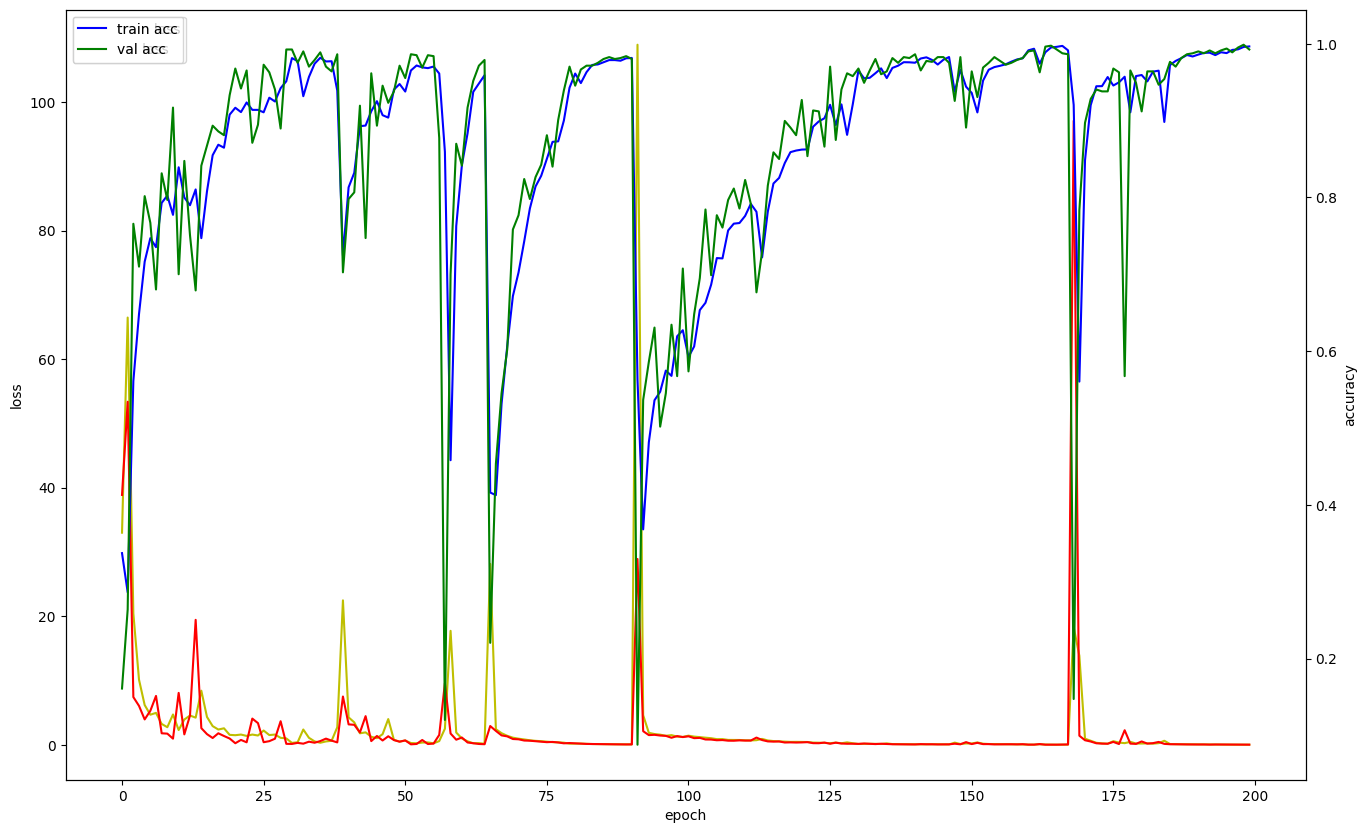

In [88]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [89]:
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.models import load_model

model = load_model('models/model.keras')

y_pred = model.predict(x_val)

multilabel_confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))

26/26 [==============================] - 0s 4ms/step


array([[[608,   0],
        [  0, 199]],

       [[782,   0],
        [  0,  25]],

       [[727,   0],
        [  0,  80]],

       [[765,   0],
        [  0,  42]],

       [[741,   0],
        [  0,  66]],

       [[793,   0],
        [  0,  14]],

       [[720,   0],
        [  1,  86]],

       [[715,   0],
        [  0,  92]],

       [[720,   1],
        [  0,  86]],

       [[691,   0],
        [  0, 116]]], dtype=int64)